#Primary info

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.feature_selection import SelectKBest, chi2

from scipy import stats
import statsmodels.api as sm
from scipy.stats import pearsonr, spearmanr, kendalltau
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [4]:
diamond_df = pd.read_csv('diamonds.csv')
diamond_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
#drop id column, cause its not informative
diamond_df = diamond_df.drop(columns = ['Unnamed: 0'])

In [6]:
rows, cols = diamond_df.shape
print('Number of columns:', cols)
print('Number of rows:', rows)

Number of columns: 10
Number of rows: 53940


In [7]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
#check null values
diamond_df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [9]:
diamond_df = diamond_df.drop_duplicates()
diamond_df.shape
# so there are no duplicates

(53794, 10)

In [10]:
print(diamond_df['price'].mean())

3933.065081607614


#Graphs and extra columns

In [11]:
#Make volume of diamonds and drop size of every side of diamond
#to make more optimized features
diamond_df['amount']=diamond_df['x']*diamond_df['y']*diamond_df['z']
diamond_df = diamond_df.drop(['x','y','z'], axis=1)
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,amount
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [12]:
num_cols = ['amount', 'carat', 'depth', 'table', 'price']
str_cols = ['cut', 'color', 'clarity']

full info

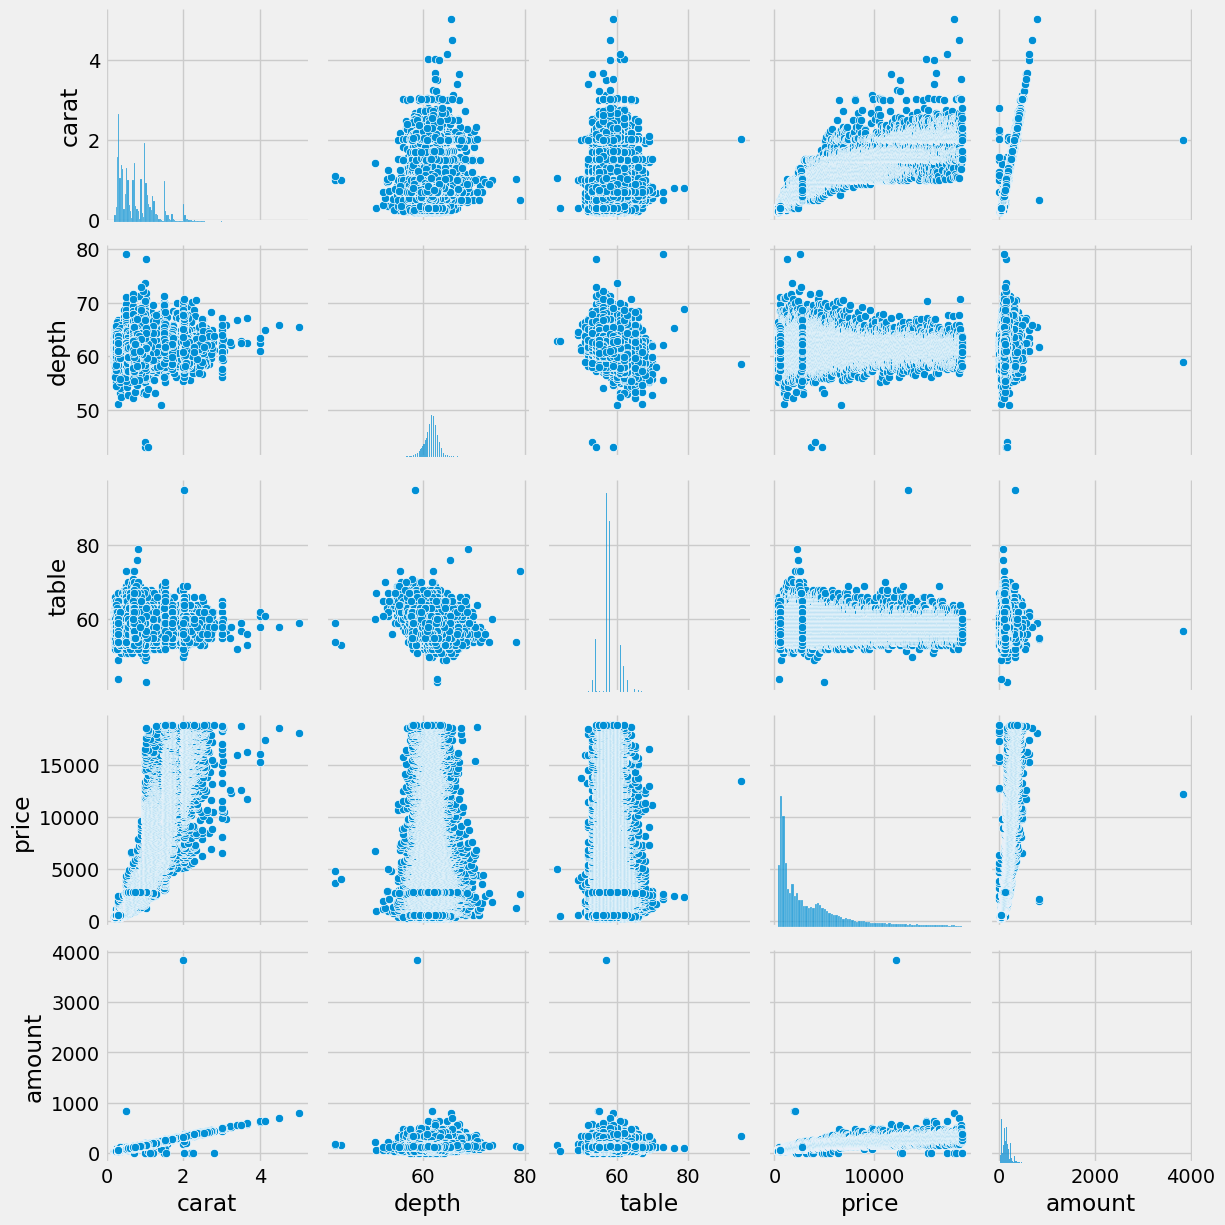

In [13]:
sns.pairplot(diamond_df)

In [14]:
#there are a lot of outliers, between carat and price quite good correlation, so it will be important feature in the prediction
#as we can see, carat and amount have the same distribution, so probably we need to drop it

In [15]:
diamond_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'amount'],
      dtype='object')

In [16]:
diamond_df

,carat,cut,color,clarity,depth,table,price,amount
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,140.766120


<Axes: title={'center': 'carat vs amount'}, xlabel='carat', ylabel='amount'>

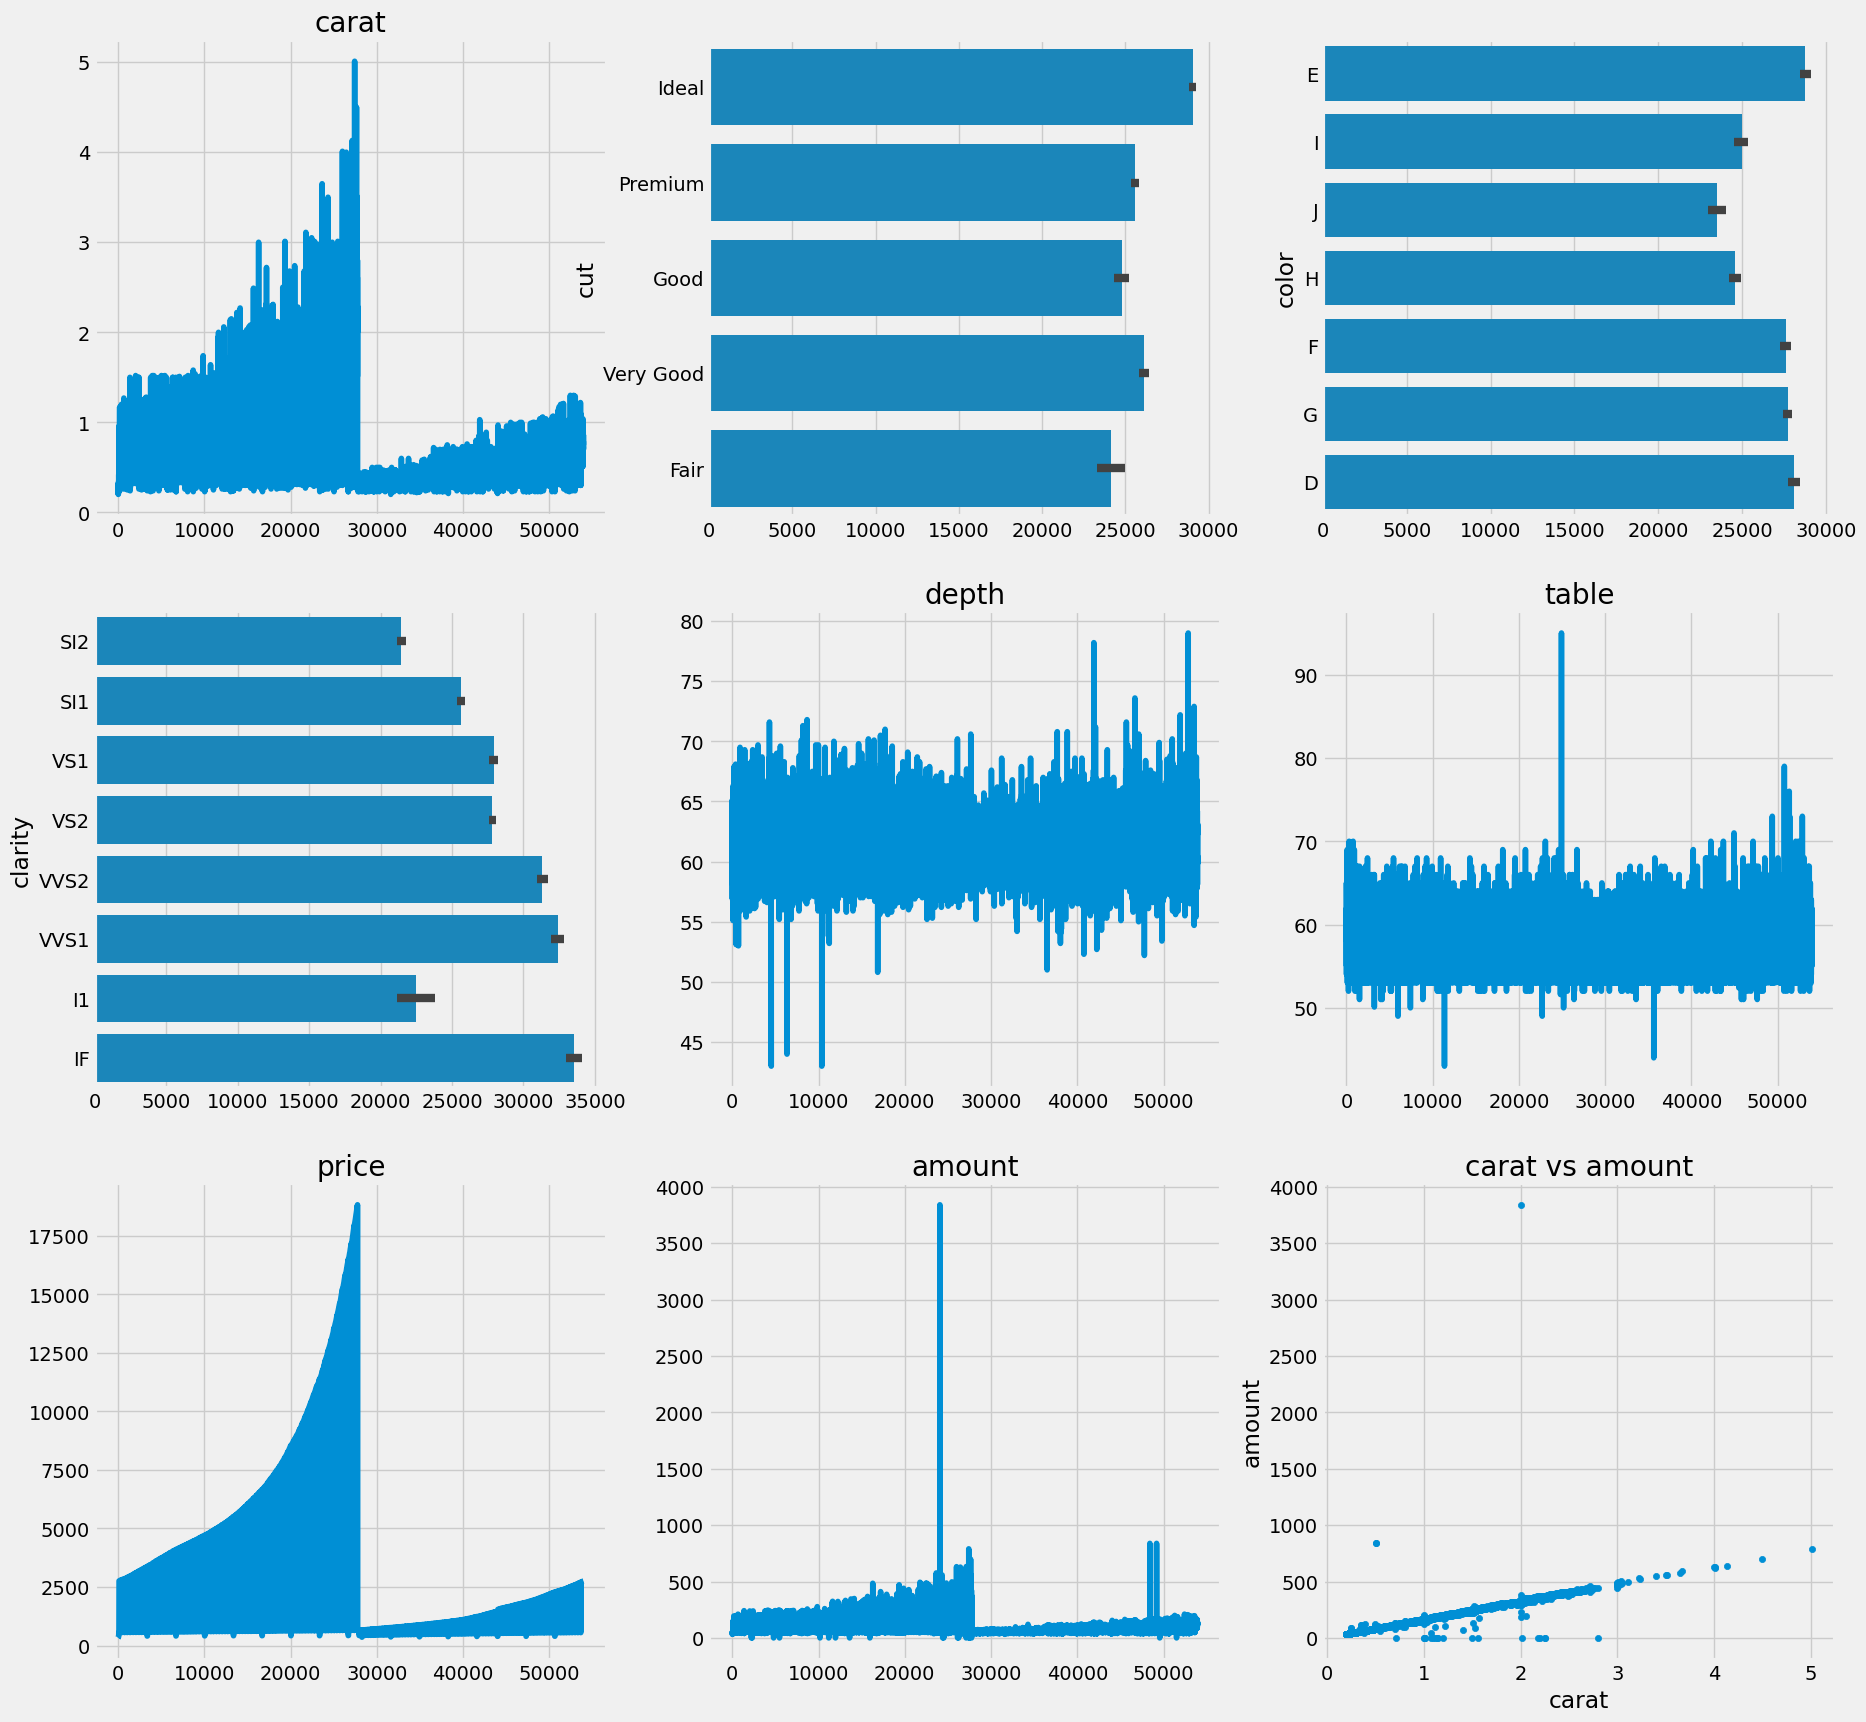

In [17]:
figure, axes = plt.subplots(nrows = 3, ncols = 3,
                            figsize=(20, 20))
diamond_df['carat'].plot(kind='line',ax = axes[0,0], title = 'carat')
sns.barplot(diamond_df['cut'], ax=axes[0,1])
sns.barplot(diamond_df['color'], ax=axes[0,2])
sns.barplot(diamond_df['clarity'], ax=axes[1,0])
diamond_df['depth'].plot(kind='line',ax = axes[1,1], title = 'depth')
diamond_df['table'].plot(kind='line',ax = axes[1,2], title = 'table')
diamond_df['price'].plot(kind='line',ax = axes[2,0], title = 'price')
diamond_df['amount'].plot(kind='line',ax = axes[2,1], title = 'amount')
diamond_df.plot(kind='scatter', x='carat', y='amount', ax = axes[2,2], title = 'carat vs amount')

In [18]:
# carat and amount are directly dependent on each other, but carat has mush better correlation with price
# there are outliers in depth and table
# all object features are distributed fairly evenly

Checking correlating between parameters

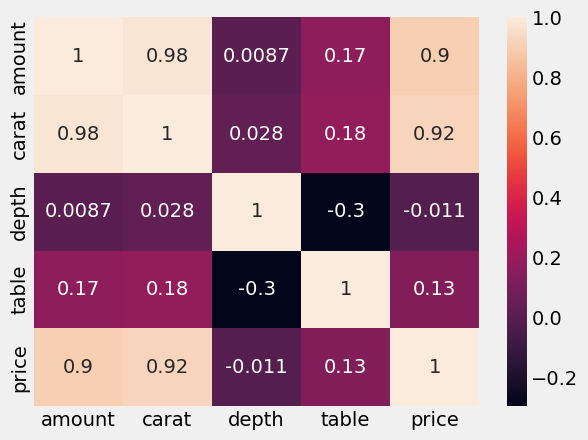

In [19]:
hm = sns.heatmap(diamond_df[num_cols].corr(),
                 cbar=True,
                 annot=True)

In [20]:
#"carat" and "amount" are correlated a lot, so lets drop "amount", because "carat" is more specified for theme of dataset

#Carat and amount

Control checking of correlation in different way to be sure

<Axes: xlabel='amount', ylabel='price'>

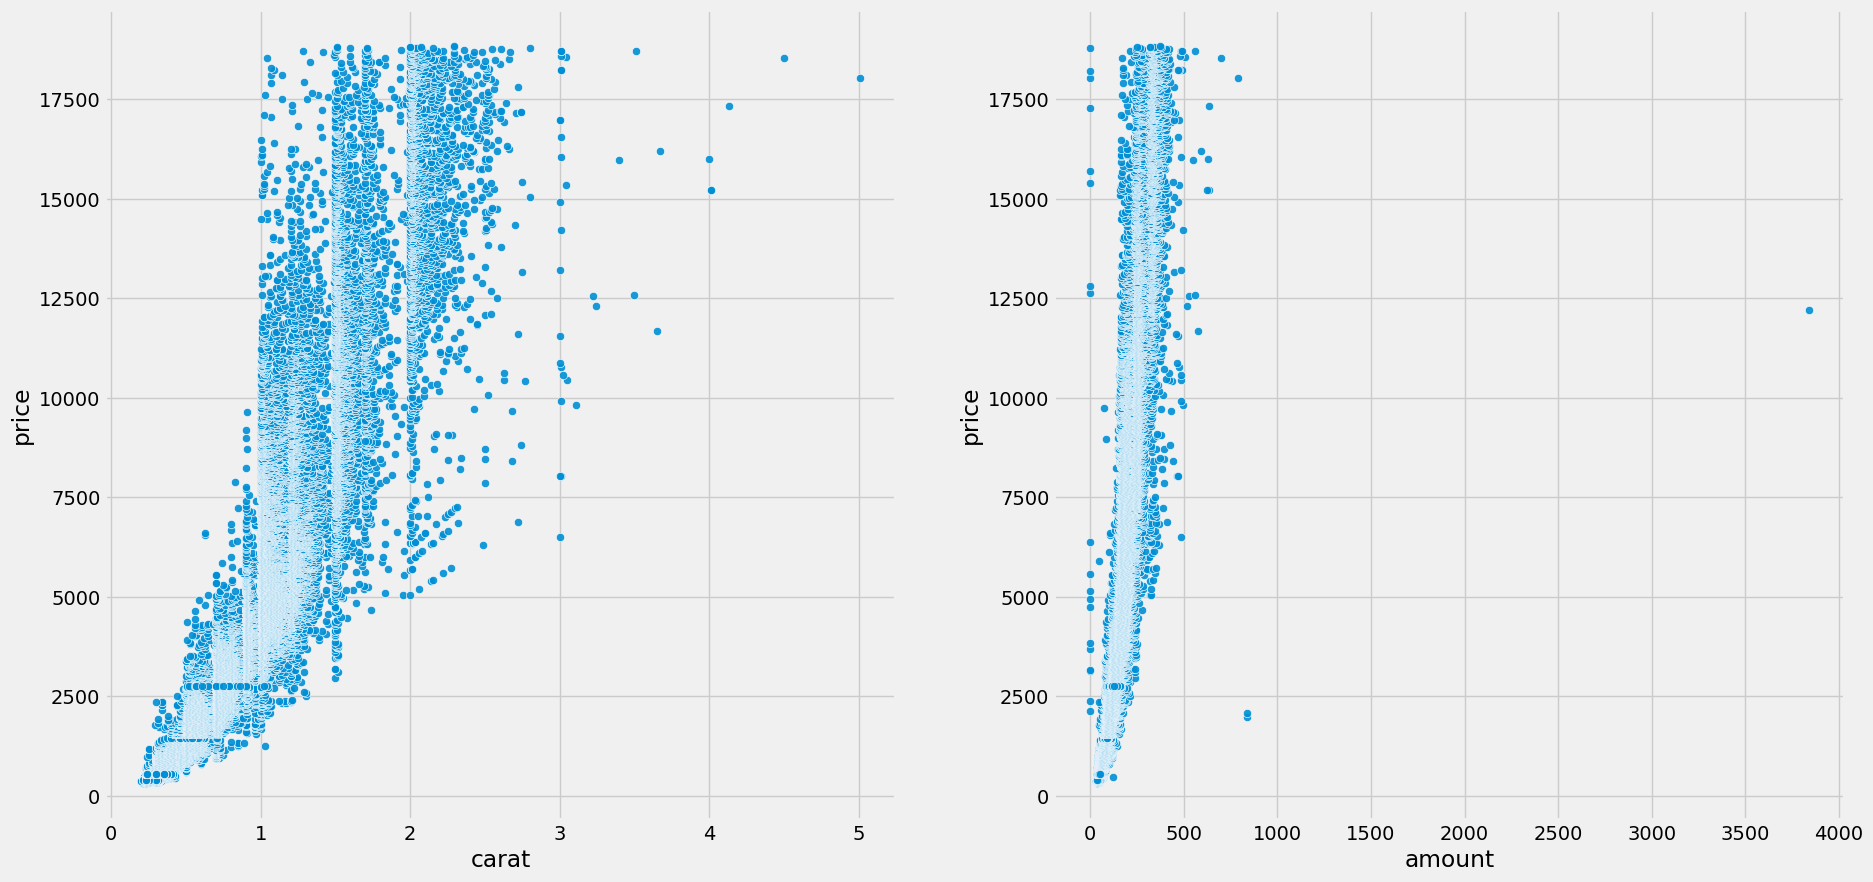

In [21]:
figure, axes = plt.subplots(nrows = 1, ncols = 2,
                            figsize=(20, 10))

sns.scatterplot(x='carat', y='price',
                data=diamond_df, alpha=0.9, ax=axes[0])
sns.scatterplot(x='amount', y='price',
                data=diamond_df, alpha=0.9, ax=axes[1])

In [22]:
r = spearmanr(diamond_df['carat'], diamond_df['amount'])
print('Spearman correlation:', r[0], 'p-value:', r[1])

Spearman correlation: 0.9969183207310035 p-value: 0.0


In [23]:
diamond_df = diamond_df.drop('amount', axis=1)

#Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x78e089567d30>,
 'caps': [<matplotlib.lines.Line2D at 0x78e0895a42b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78e089567a60>],
 'medians': [<matplotlib.lines.Line2D at 0x78e0895a47f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x78e0895a4a90>],
 'means': []}

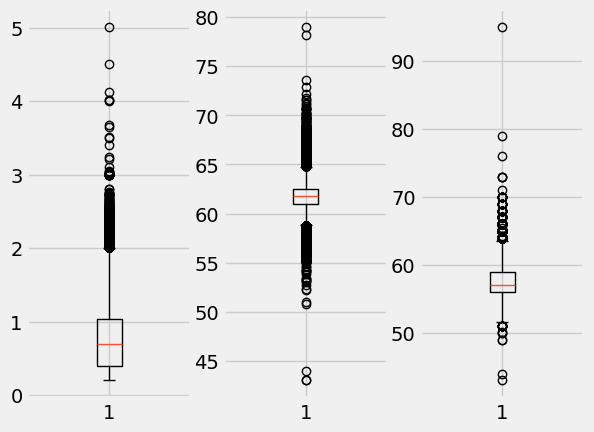

In [24]:
plt.subplot(1, 3, 1)
plt.boxplot(diamond_df['carat'])
plt.subplot(1, 3, 2)
plt.boxplot(diamond_df['depth'])
plt.subplot(1, 3, 3)
plt.boxplot(diamond_df['table'])


In [25]:
#so there are all dots are outliers, and we need to clear them

Using z-score and rule 68-95-99.7 for correction of dataset outliers

In [29]:
int_cols=['carat', 'depth', 'table']
z = stats.zscore(diamond_df[int_cols])
z.head()

,carat,depth,table
0,-1.199402,-0.173495,-1.100486
1,-1.241651,-1.362393,1.585691
2,-1.199402,-3.390512,3.376475
3,-1.072656,0.455922,0.242603
4,-1.030407,1.085338,0.242603


In [30]:
diamond_df[(np.abs(z) > 3).any(axis = 1)].head()

,carat,cut,color,clarity,depth,table,price
2,0.23,Good,E,VS1,56.9,65.0,327
91,0.86,Fair,E,SI2,55.1,69.0,2757
97,0.96,Fair,F,SI2,66.3,62.0,2759
204,0.98,Fair,H,SI2,67.9,60.0,2777
221,0.70,Good,E,VS1,57.2,62.0,2782


In [31]:
z_mask = (np.abs(z) < 3).all(axis = 1)

diamond_df= diamond_df[z_mask]
diamond_df.shape
#Was 53940

(52439, 7)

#Distribution of price

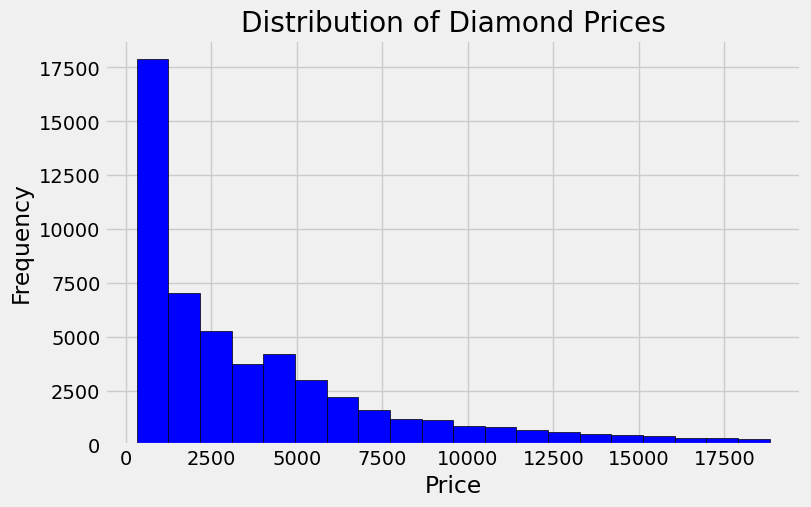

In [32]:
plt.figure(figsize=(8,5))
plt.hist(diamond_df['price'], bins=20, color='b', edgecolor='k');
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Prices')
plt.show()

In [33]:
#there are a lot of low-cost diamonds, and just a bit of high-cost diamonds

#Feature importance

In [34]:
num_cols = ['carat', 'depth', 'table']

In [35]:
X = diamond_df[num_cols]
y = diamond_df['price']

Best_features = SelectKBest(score_func = chi2, k = 'all')
fit = Best_features.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs', 'scores']
featureScores

,Specs,scores
0,carat,13034.227643
1,depth,347.694797
2,table,1095.827427


In [36]:
#for numerical data, as graphs says, carat is more important then others

#Categorical data

In [37]:
label_encoder = LabelEncoder()

diamond_df['cut'] = label_encoder.fit_transform(diamond_df['cut'])
diamond_df['color'] = label_encoder.fit_transform(diamond_df['color'])
diamond_df['clarity'] = label_encoder.fit_transform(diamond_df['clarity'])

In [38]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,2,1,3,61.5,55.0,326
1,0.21,3,1,2,59.8,61.0,326
3,0.29,3,5,5,62.4,58.0,334
4,0.31,1,6,3,63.3,58.0,335
5,0.24,4,6,7,62.8,57.0,336


#Normalization

there are a lot of different numbers with different variance so we need to normalize them

In [42]:
norm = MinMaxScaler()
norm.fit_transform(diamond_df.drop(columns = ['price']))

array([[0.01492537, 0.5       , 0.16666667, 0.42857143, 0.47058824,
        0.30769231],
       [0.00497512, 0.75      , 0.16666667, 0.28571429, 0.27058824,
        0.76923077],
       [0.04477612, 0.75      , 0.83333333, 0.71428571, 0.57647059,
        0.53846154],
       ...,
       [0.24875622, 1.        , 0.        , 0.28571429, 0.62352941,
        0.69230769],
       [0.32835821, 0.75      , 0.66666667, 0.42857143, 0.41176471,
        0.53846154],
       [0.27363184, 0.5       , 0.        , 0.42857143, 0.55294118,
        0.30769231]])

In [43]:
diamond_df

,carat,cut,color,clarity,depth,table,price
0,0.23,2,1,3,61.5,55.0,326
1,0.21,3,1,2,59.8,61.0,326
3,0.29,3,5,5,62.4,58.0,334
4,0.31,1,6,3,63.3,58.0,335
5,0.24,4,6,7,62.8,57.0,336
...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757
53936,0.72,1,0,2,63.1,55.0,2757
53937,0.70,4,0,2,62.8,60.0,2757
53938,0.86,3,4,3,61.0,58.0,2757


#save to csv

In [45]:
diamond_df.to_csv('train.csv')